In [192]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy import stats
import chart_studio.plotly as py
from sklearn.metrics import r2_score
import plotly.express as px
import cufflinks as cf
import plotly.graph_objects as go
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode,plot
init_notebook_mode(connected=True)
cf.go_offline()
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [193]:
df=pd.read_csv('World Happiness Report.csv')

# Getting the basic outlook over the dataset

In [194]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [195]:
df.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [196]:
df.shape

(158, 12)

Observations:
    
    1.There are 158 rows and 12 columns.

In [197]:
df.nunique()

Country                          158
Region                            10
Happiness Rank                   157
Happiness Score                  157
Standard Error                   153
Economy (GDP per Capita)         158
Family                           158
Health (Life Expectancy)         157
Freedom                          158
Trust (Government Corruption)    157
Generosity                       158
Dystopia Residual                158
dtype: int64

Observations:
    
    1.There are 158 countries from 10 different regions.
    2.Two  countries share same Happiness Rank and Happiness Score those are Montenegro and Jordon(by using:1.df['Happiness Rank'].value_counts(), 2.df.loc[(df['Happiness Rank']==82)]).
    3.And if we consider all other columns most of the values are repeated.
    
    

In [198]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


Observations:
    
    1.The mean value of Happiness Score is 5.37
    2.There is a significant gap between 75th percentile and max in case of Standard Error ,Trust,Genorosity and Dystopia Residual indicating that there could be the possibalities of outliers.
    3.Lets do some research on mean value of Happiness Score which is 5.375

In [199]:
data1=df.loc[(df['Happiness Score']<5.38)]

In [200]:
data1.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
74,Vietnam,Southeastern Asia,75,5.360,0.03107,0.63216,0.91226,0.74676,0.59444,0.10441,0.16860,2.20173
75,Turkey,Middle East and Northern Africa,76,5.332,0.03864,1.06098,0.94632,0.73172,0.22815,0.15746,0.12253,2.08528
76,Kyrgyzstan,Central and Eastern Europe,77,5.286,0.03823,0.47428,1.15115,0.65088,0.43477,0.04232,0.30030,2.23270
77,Nigeria,Sub-Saharan Africa,78,5.268,0.04192,0.65435,0.90432,0.16007,0.34334,0.04030,0.27233,2.89319
78,Bhutan,Southern Asia,79,5.253,0.03225,0.77042,1.10395,0.57407,0.53206,0.15445,0.47998,1.63794


Observations:
    
    1.Vietnam is the country which is almost near to mean value of Happiness Score.

In [201]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

Observations:

    1.There are 12 columns.

# EDA

# Univariate Analysis

In [202]:
#Lets analyse each column one by one

1.Country

In [203]:
df['Country'].value_counts()

Comoros                 1
Netherlands             1
Macedonia               1
United Arab Emirates    1
Philippines             1
                       ..
Madagascar              1
Rwanda                  1
Jamaica                 1
Tunisia                 1
El Salvador             1
Name: Country, Length: 158, dtype: int64

Observations:
    
    1.There are 158 distinct country.

2.Region

In [204]:
df['Region'].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
Australia and New Zealand           2
North America                       2
Name: Region, dtype: int64

Observations:

    1.There are 10 different regions.
    2.Most of the countries in this dataset is from Sub-Saharan Africa and Central and Eastern Europe.

[Text(0, 0, 'Western Europe'),
 Text(1, 0, 'North America'),
 Text(2, 0, 'Australia and New Zealand'),
 Text(3, 0, 'Middle East and Northern Africa'),
 Text(4, 0, 'Latin America and Caribbean'),
 Text(5, 0, 'Southeastern Asia'),
 Text(6, 0, 'Central and Eastern Europe'),
 Text(7, 0, 'Eastern Asia'),
 Text(8, 0, 'Sub-Saharan Africa'),
 Text(9, 0, 'Southern Asia')]

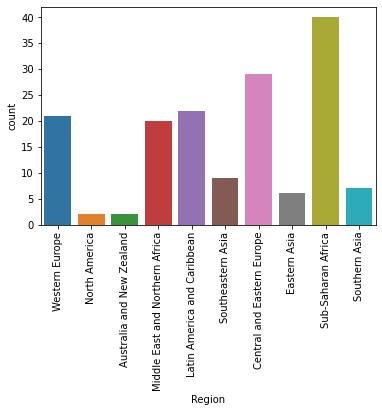

In [205]:
plt.figure()
count1=sns.countplot(df['Region'])
count1.set_xticklabels(count1.get_xticklabels(), rotation=90)


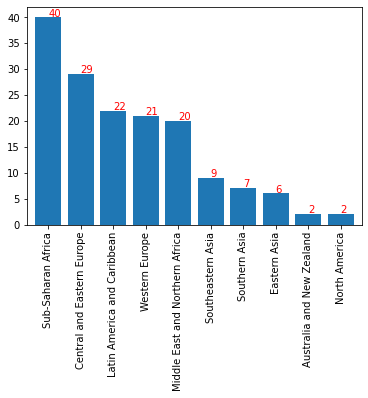

In [206]:
s = df['Region'].value_counts()
ax=s.plot.bar(width=.8) 
for i, v in s.reset_index().iterrows():
    ax.text(i, v.Region + 0.2 , v.Region, color='red')

Observations:
    
    1.Most of the countries in this dataset is from Sub-Saharan Africa and Central and Eastern Europe.

3.Happiness Rank

In [207]:
df['Happiness Rank'].value_counts()

82     2
158    1
50     1
57     1
56     1
      ..
106    1
105    1
104    1
103    1
1      1
Name: Happiness Rank, Length: 157, dtype: int64

4.Happiness Score

In [208]:
df['Happiness Score'].describe()

count    158.000000
mean       5.375734
std        1.145010
min        2.839000
25%        4.526000
50%        5.232500
75%        6.243750
max        7.587000
Name: Happiness Score, dtype: float64

Observations:
    
    1.The minimum value is 2.83 and maximum value is 7.58 and mean value is 5.37

<AxesSubplot:xlabel='Happiness Score', ylabel='Density'>

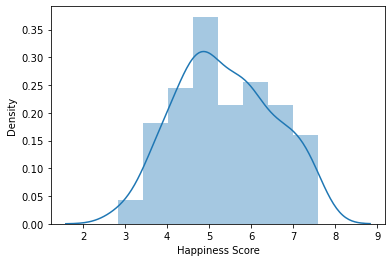

In [209]:
sns.distplot(df['Happiness Score'],kde=True)

Observations:
    
    1.The distribution score of happiness is quite right  skewed.

<AxesSubplot:xlabel='Happiness Score'>

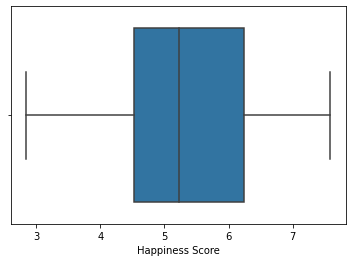

In [210]:
sns.boxplot(df['Happiness Score'])

Observations:
    
    1.There are no outliers in the happiness score.

5.Standard Error

In [211]:
df['Standard Error'].describe()

count    158.000000
mean       0.047885
std        0.017146
min        0.018480
25%        0.037268
50%        0.043940
75%        0.052300
max        0.136930
Name: Standard Error, dtype: float64

Observations:
    
    1.The Standard Error ranges from 0.047 to 0.136.

<AxesSubplot:xlabel='Standard Error', ylabel='Density'>

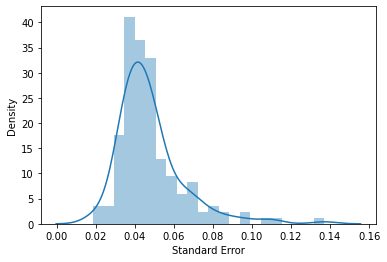

In [212]:
sns.distplot(df['Standard Error'])

Observations:
    
    1.The graph is quite left skewed.

<AxesSubplot:xlabel='Standard Error'>

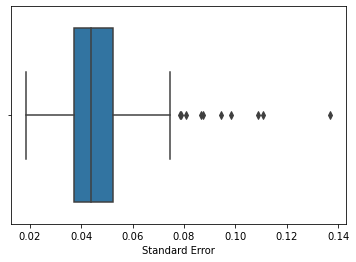

In [213]:
sns.boxplot(df['Standard Error'])

Observations:
    
    1.There are few outliers here.

6.Economy (GDP per Capita)

In [214]:
df['Economy (GDP per Capita)'].describe()

count    158.000000
mean       0.846137
std        0.403121
min        0.000000
25%        0.545808
50%        0.910245
75%        1.158448
max        1.690420
Name: Economy (GDP per Capita), dtype: float64

Observations:
    
    1.The GDP ranges from 0 to 1.69.
    2.If we observe the different percentile and from 75th percentile to maximum value it follows the same trend as like 25th to 50th percentile, and 50th to 75th percentile,so this indicates that the presence of outliers is significantly least

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Density'>

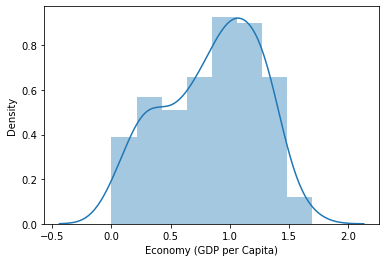

In [215]:
sns.distplot(df['Economy (GDP per Capita)'],kde=True)

Observations:
    
    1.The data is significantly right skewed.

<AxesSubplot:xlabel='Economy (GDP per Capita)'>

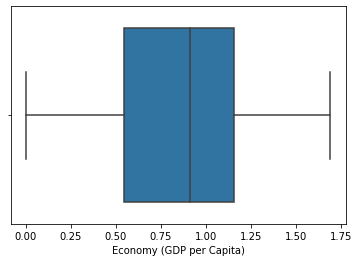

In [216]:
sns.boxplot(df['Economy (GDP per Capita)'])

Observations:
    
    1.There are no outliers.

7.Family

In [217]:
df['Family'].describe()

count    158.000000
mean       0.991046
std        0.272369
min        0.000000
25%        0.856823
50%        1.029510
75%        1.214405
max        1.402230
Name: Family, dtype: float64

Observations:
    
    1.The minimum value is 0 and maximum value is 1.4.
    2.By observing different percentiles and max value we can say that there are not much outliers.

<AxesSubplot:xlabel='Family', ylabel='Density'>

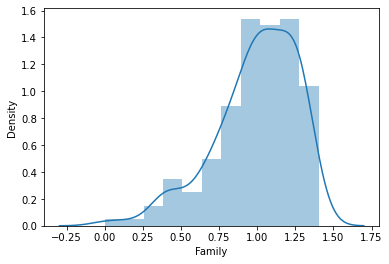

In [218]:
sns.distplot(df['Family'])

Observations:
    
    1.The data is completely right skewed.

<AxesSubplot:xlabel='Family'>

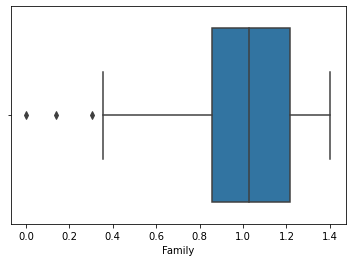

In [219]:
sns.boxplot(df['Family'])

8.Health (Life Expectancy)

In [220]:
df['Health (Life Expectancy)'].describe()

count    158.000000
mean       0.630259
std        0.247078
min        0.000000
25%        0.439185
50%        0.696705
75%        0.811013
max        1.025250
Name: Health (Life Expectancy), dtype: float64

Observations:
    
    1.The value ranges from 0 to 1.02.
    

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Density'>

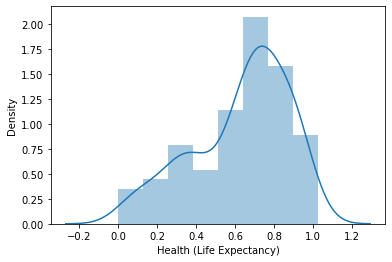

In [221]:
sns.distplot(df['Health (Life Expectancy)'],kde=True)

Observations:
    
    1.The data is right skewed.

<AxesSubplot:xlabel='Health (Life Expectancy)'>

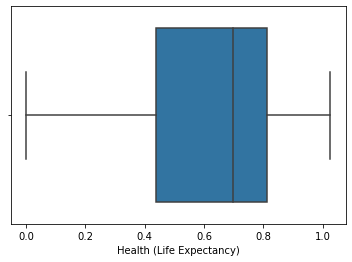

In [222]:
sns.boxplot(df['Health (Life Expectancy)'])

Obsevations:
    
    1.There are significantly less outliers.

9.Freedom

In [223]:
df['Freedom'].describe()

count    158.000000
mean       0.428615
std        0.150693
min        0.000000
25%        0.328330
50%        0.435515
75%        0.549092
max        0.669730
Name: Freedom, dtype: float64

Observations:
    
    1.The value ranges from 0 to 0.66.

<AxesSubplot:xlabel='Freedom', ylabel='Density'>

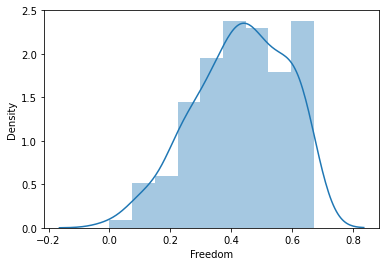

In [224]:
sns.distplot(df['Freedom'])

Observations:
    
    1.The graph is right skewed.

<AxesSubplot:xlabel='Freedom'>

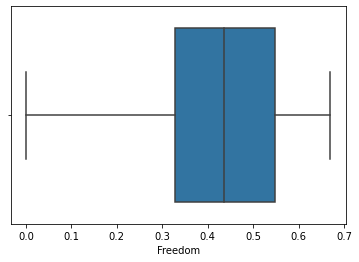

In [225]:
sns.boxplot(df['Freedom'])

Observations:
    
    1.There are no outliers.

10.Trust (Government Corruption)

In [226]:
df['Trust (Government Corruption)'].describe()

count    158.000000
mean       0.143422
std        0.120034
min        0.000000
25%        0.061675
50%        0.107220
75%        0.180255
max        0.551910
Name: Trust (Government Corruption), dtype: float64

Observations:
    
    1.The value ranges from 0 to 0.55 and mean is 0.143

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Density'>

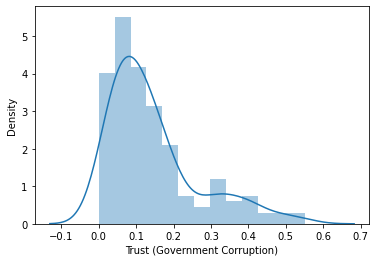

In [227]:
sns.distplot(df['Trust (Government Corruption)'])

Observations:
    
    1.The data is clearly left skewed.

<AxesSubplot:xlabel='Trust (Government Corruption)'>

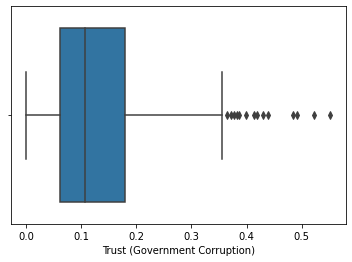

In [228]:
sns.boxplot(df['Trust (Government Corruption)'])

Observations:
    
    1.There are outliers.

11.Generosity

In [229]:
df['Generosity'].describe()

count    158.000000
mean       0.237296
std        0.126685
min        0.000000
25%        0.150553
50%        0.216130
75%        0.309883
max        0.795880
Name: Generosity, dtype: float64

Observations:
    
    1.The value ranges from 0 to 0.79

<AxesSubplot:xlabel='Generosity', ylabel='Density'>

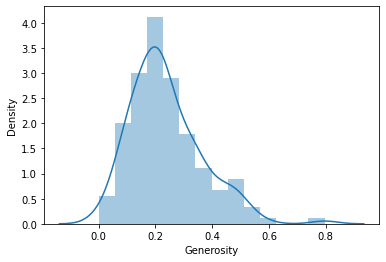

In [230]:
sns.distplot(df['Generosity'])

Observations:
    
    1.The data is slightly skewed.

<AxesSubplot:xlabel='Generosity'>

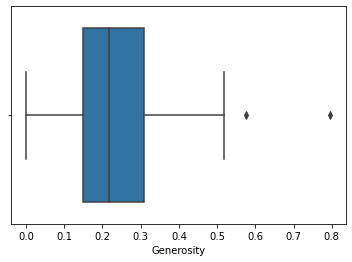

In [231]:
sns.boxplot(df['Generosity'])

Observations:
    
    1.There are few outliers.

12.Dystopia Residual

In [232]:
df['Dystopia Residual'].describe()

count    158.000000
mean       2.098977
std        0.553550
min        0.328580
25%        1.759410
50%        2.095415
75%        2.462415
max        3.602140
Name: Dystopia Residual, dtype: float64

Observations:
    
    1.The value ranges from 0.32 to 3.6

<AxesSubplot:xlabel='Dystopia Residual', ylabel='Density'>

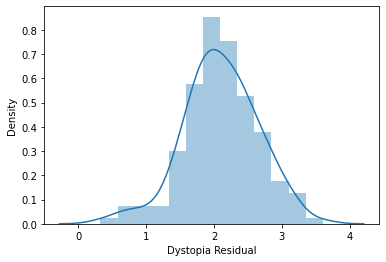

In [233]:
sns.distplot(df['Dystopia Residual'])

Observations:
    
    1.The graph is slightly right skewed.

<AxesSubplot:xlabel='Dystopia Residual'>

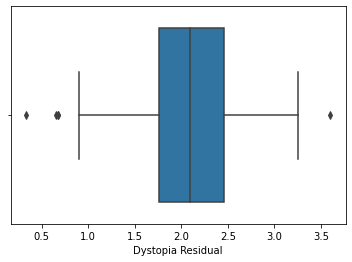

In [234]:
sns.boxplot(df['Dystopia Residual'])

Observations:
    
    1.There are few outliers.

# Multivariate Analysis

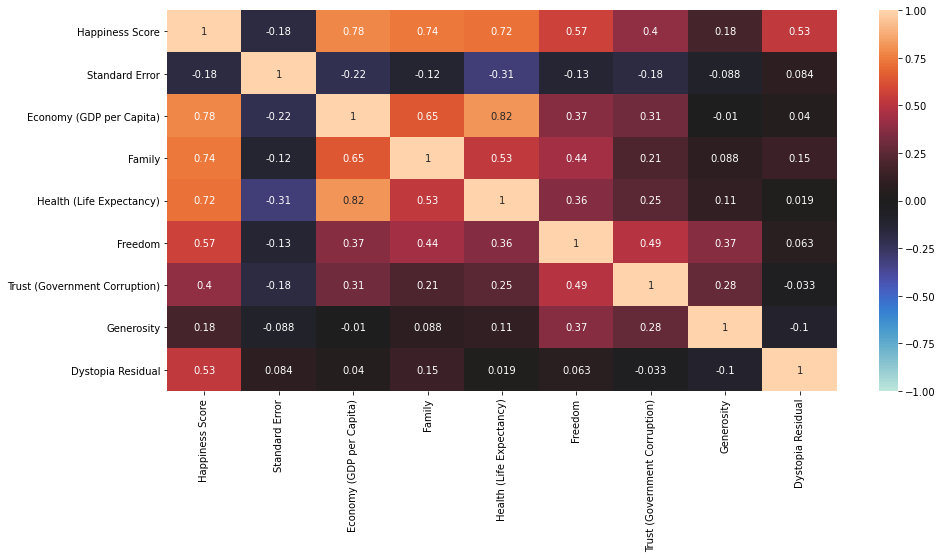

In [235]:
#Since we have happiness score we can remove happiness rank column so that it will be quite easy for the further analysis.
df=df.drop(columns=['Happiness Rank'])
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0)
plt.show()

Observations:
    
    1.Happiness score is highly positively correlated(+0.78).
    2.The major important factor for the happiness score is GDP,Family,Life expectency or Health
    3.standard error is the only thing which is negatively correlated.
    
    

In [236]:
from heatmap import heatmap,corrplot

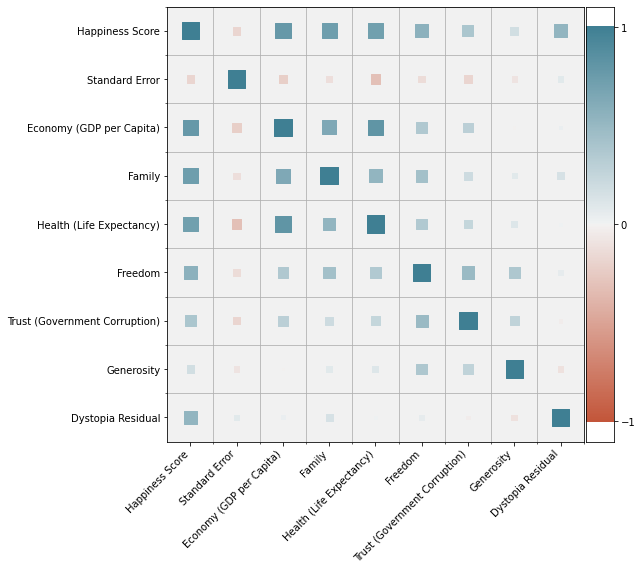

In [237]:
plt.figure(figsize=(8,8))
corrplot(df.corr(),size_scale=300)

Observations:
    
    1.Lets take out some of the highly correlated columns to happiness score as well as to each other and anlyse them at Bivariate analysis.
    2.Standard error is the only variable that has negative correlation apart from that all other variables are positively correlated to each other.
    3.The combinations we have to analyse are:
            1.Happiness score vs GDP
            2.Happiness score vs Family
            3.Happiness score vs Health
            4.Happiness score vs Freedom
            5.GDP vs Family
            6.GDP vs Health
            

In [238]:
fig=px.scatter_3d(df,x='Economy (GDP per Capita)',y='Happiness Score',z='Family',color='Region',opacity=0.7)
fig

Observations:
    
    1.This is the best plot representing how GDP,Family and Happiness Scores behaves in the similar fashion.

# Bivariate Analysis

In [239]:
fig=px.bar(df,y='Happiness Score',x='Country',text='Happiness Score',color='Region')
fig

#lets keep the annotations at the top of the bar graph
fig.update_traces(texttemplate='%{text:.2s}',
                 textposition='outside')

fig.update_layout(uniformtext_minsize=8)
fig.update_layout(xaxis_tickangle=-45)
fig

Observations:
    
    1.Western Europe, Australia,North America, Latin America and carabbian has got significantly high Happiness score.
    2.There are countries Isrel in the northern africa which has got good Happiness Score.
    3.Sub sahara africa has got countries which has low Happiness scores.

In [240]:
#Pause and check how incriment in family score leads to GDP and eventually to Happiness scores
px.bar(df, x='Economy (GDP per Capita)', y='Happiness Score', color='Region', animation_frame='Family', animation_group='Region', range_y=[0,8])

In [241]:
px.scatter(df,x='Economy (GDP per Capita)',y='Happiness Score',color='Region',hover_data=['Region'])

Observations:
    
    1.The above graph clearly depicts that irrespective of the region the GDP is directly propotional to Happiness Score.

In [242]:
px.scatter(df,x='Health (Life Expectancy)',y='Happiness Score',color='Region',hover_data=['Region'])

Observations:
    
    1.The above graph is clearly infers that Health is the major criteria for the happiness scores irrespective of the region.

In [243]:
px.scatter(df,x='Family',y='Happiness Score',color='Region',hover_data=['Region'])

Observations:

1.The above graph is clearly infers that Family is the major criteria for the happiness scores irrespective of the region.

In [244]:
px.scatter(df,x='Freedom',y='Happiness Score',color='Region',hover_data=['Region'])

Observations:
    
    1.Freedom is also a important criterion for Happiness Score.

In [245]:
px.scatter(df,x='Economy (GDP per Capita)',y='Family',color='Region',hover_data=['Region'])

Observations:
    
    1.Both are interrelated.

# Data Cleaning

In [246]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

Observations:
    
    1.There are no null values.

In [247]:
#Lets drop country and region as its no longer useful further.
df.drop(['Country', 'Region'], axis='columns', inplace=True)
from scipy.stats import zscore

# Removing the Outliers

In [248]:
z=np.abs(zscore(df))

In [249]:
z

array([[1.93736005, 0.80592569, 1.36962124, ..., 2.30965159, 0.47103971,
        0.75825809],
       [1.91458063, 0.05588945, 1.13522625, ..., 0.01647953, 1.57585637,
        1.09285682],
       [1.88479215, 0.8544869 , 1.19286069, ..., 2.8427738 , 0.8242928 ,
        0.71233526],
       ...,
       [2.0761992 , 0.13253425, 0.45524543, ..., 0.38141902, 1.85689094,
        3.20843049],
       [2.1646885 , 2.26396166, 2.06756644, ..., 0.35771452, 0.31694987,
        0.48198451],
       [2.22251319, 1.13418227, 1.58633379, ..., 0.30180313, 0.5581534 ,
        0.96361241]])

In [250]:
df_new=df[(z<3).all(axis=1)]

In [251]:
df_new.shape

(149, 9)

In [252]:
df.shape

(158, 9)

In [253]:
#There is only 5% data has lost so we can continue(9/158=0.056=5.6%)

# Checking for Skewness

In [254]:
df_new.skew()

Happiness Score                  0.169740
Standard Error                   1.243048
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    1.272530
Generosity                       0.654710
Dystopia Residual               -0.021144
dtype: float64

In [255]:
from scipy import stats
df_new['Standard Error'] =stats.boxcox(df_new['Standard Error'])[0]

In [256]:
df_new['Standard Error'].skew()

-0.010172849058486798

In [257]:
df_new['Family'] =np.sqrt(df_new['Family'])

In [258]:
df_new['Family'].skew()

-1.1820686520731256

In [259]:
df_new.skew()

Happiness Score                  0.169740
Standard Error                  -0.010173
Economy (GDP per Capita)        -0.390657
Family                          -1.182069
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    1.272530
Generosity                       0.654710
Dystopia Residual               -0.021144
dtype: float64

In [260]:
df_new['Trust (Government Corruption)'] =np.log(df_new['Trust (Government Corruption)'])[0]

In [261]:
df_new['Trust (Government Corruption)'].skew()

0

In [262]:
df_new['Generosity'] =np.log(df_new['Generosity'])[0]

In [263]:
df_new['Generosity'].skew()

0

In [264]:
df_new.skew()

Happiness Score                  0.169740
Standard Error                  -0.010173
Economy (GDP per Capita)        -0.390657
Family                          -1.182069
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    0.000000
Generosity                       0.000000
Dystopia Residual               -0.021144
dtype: float64

# Model Building

In [265]:
lg=LinearRegression()

In [266]:
x=df_new.drop('Happiness Score',axis=1)

In [267]:
x.head()

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,-4.039042,1.39651,1.161684,0.94143,0.66557,-0.868025,-1.214764,2.51738
1,-3.540284,1.30232,1.184158,0.94784,0.62877,-0.868025,-1.214764,2.70201
2,-4.073950,1.32548,1.166439,0.87464,0.64938,-0.868025,-1.214764,2.49204
3,-3.857918,1.45900,1.153668,0.88521,0.66973,-0.868025,-1.214764,2.46531
4,-3.981440,1.32629,1.150048,0.90563,0.63297,-0.868025,-1.214764,2.45176


In [268]:
x.shape

(149, 8)

In [269]:
y=df_new['Happiness Score']

In [270]:
y.head()

0    7.587
1    7.561
2    7.527
3    7.522
4    7.427
Name: Happiness Score, dtype: float64

In [271]:
y.shape

(149,)

In [272]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.23,random_state=43)

In [273]:
print('x_train shape is :',x_train.shape)
print('\n')
print('x_test shape is :',x_test.shape)
print('\n')
print('y_train shape is :',y_train.shape)
print('\n')
print('y_test shape is :',y_test.shape)

x_train shape is : (114, 8)


x_test shape is : (35, 8)


y_train shape is : (114,)


y_test shape is : (35,)


In [274]:
#Finding the best Random State

In [275]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.23,random_state=i)
    mod=lg
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=mean_squared_error(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('the best accuracy is ',maxAccu,'on random state',maxRS)

the best accuracy is  0.04704348954177588 on random state 18


In [276]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.23,random_state=i)
    mod=lg
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('the best accuracy is ',maxAccu,'on random state',maxRS)

the best accuracy is  0.9932399198434272 on random state 47


In [277]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.23,random_state=47)

In [278]:
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print('r2 score is :',round((r2_score(y_test,pred)),3))
print('mean squared error :',round((mean_squared_error(y_test,pred)),3))

r2 score is : 0.993
mean squared error : 0.01


In [279]:
ls=Lasso(alpha=0.01)
ls.fit(x_train,y_train)
predls=ls.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predls)),3))
print('mean squared error :',round((mean_squared_error(y_test,predls)),3))

r2 score is : 0.99
mean squared error : 0.015


In [280]:
rd=Ridge(alpha=0.1)
rd.fit(x_train,y_train)
predrd=rd.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predrd)),3))
print('mean squared error :',round((mean_squared_error(y_test,predrd)),3))

r2 score is : 0.994
mean squared error : 0.009


In [281]:
enr=ElasticNet(alpha=0.001)
enr.fit(x_train,y_train)
predenr=enr.predict(x_test)
print('r2 score is :',round((r2_score(y_test,predenr)),3))
print('mean squared error :',round((mean_squared_error(y_test,predenr)),3))

r2 score is : 0.994
mean squared error : 0.009


Observations:
    
    1.I will go for enr model because it has best r2_score and least mean_squared_error.

In [282]:
#import joblib
#joblib.dump(enr,'enr_Happiness.obj')